The Indian Premier League (IPL) is a professional Twenty20 cricket league in India contested during April and May of every year by teams representing Indian cities and some states. The league was founded by the Board of Control for Cricket in India (BCCI) in 2008. The IPL is the most-attended cricket league in the world and in 2014 ranked sixth by average attendance among all sports leagues. There have been ten seasons of the IPL tournament so far.

# 1.Problem Statement:

In this IPL data analysis, IPL matches from 2008 to 2018 is been analyzed and shown using python packages like pandas, matplotlib. This Exploratory Data Analysis will help us to find patterns in data, determining relationships in data. We will try to identify the team that has more chance to win the upcoming seasons by finding observations like success rate of each team, identify the team that has won maximum seasons, best defending and chasing team and analyse the toss decisions etc.

In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize']=17,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
from plotly import tools


import plotly.figure_factory as ff

#for collab
import plotly.io as pio
import io



import folium

# function to add data to plot
def annot_plot(ax,w,h):                                    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))





import warnings
warnings.filterwarnings("ignore")

In [2]:
# for collab
#plotly.io.renderers .default='colab'

In [3]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

# 2. Loading the Dataset:

The dataset consists of the information about IPL matches held from 2008 to 2018.
The dataset comprises of 696 observations of 18 columns. Below is a table showing names of all the columns and their description.

In [4]:
#for collab
#from google.colab import files
#uploaded = files.upload()

In [5]:
#for collab
#dm = pd.read_csv(io.BytesIO(uploaded['matches.csv']))
#dm.head()

In [6]:
dm = pd.read_csv(r"D:\Data Science Projects\IPL data analysis\matches.csv")
dm.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


The above table shows the First 5 rows of the matches held in IPL.

In [7]:
#for collab
#from google.colab import files
#uploaded = files.upload()

In [8]:
#for collab
#dd = pd.read_csv(io.BytesIO(uploaded['deliveries.csv']))
#dd.head()

In [9]:
dd = pd.read_csv(r"D:\Data Science Projects\IPL data analysis\deliveries.csv")
dd.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


The above table shows the First 5 rows of a match which included information about ball by ball i.e deliveries held in IPL.

In [10]:
#shape gives the number of rows and columns 
dd.shape

(179078, 21)

In [11]:
#Gives the columns of matches.csv
dm.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

# 3.Eliminating redundancy



In [12]:
dm.at[dm['city']=='Bengaluru','city']='Bangalore'

There were two entries for the same city as 'Bangalore' and 'Bengaluru' so we have to make it one value to avoid confusion between these two cities.

In [13]:
#Since umpire3 contains all null values we can drop the column
dm.drop(['umpire3'], axis = 1, inplace = True)
dm.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


As the column of Umpire has not distinct values so it useless to involve that kind of values

# 4.Macthes Analysis


### 4.1 Venue of the most matches hosted in each City

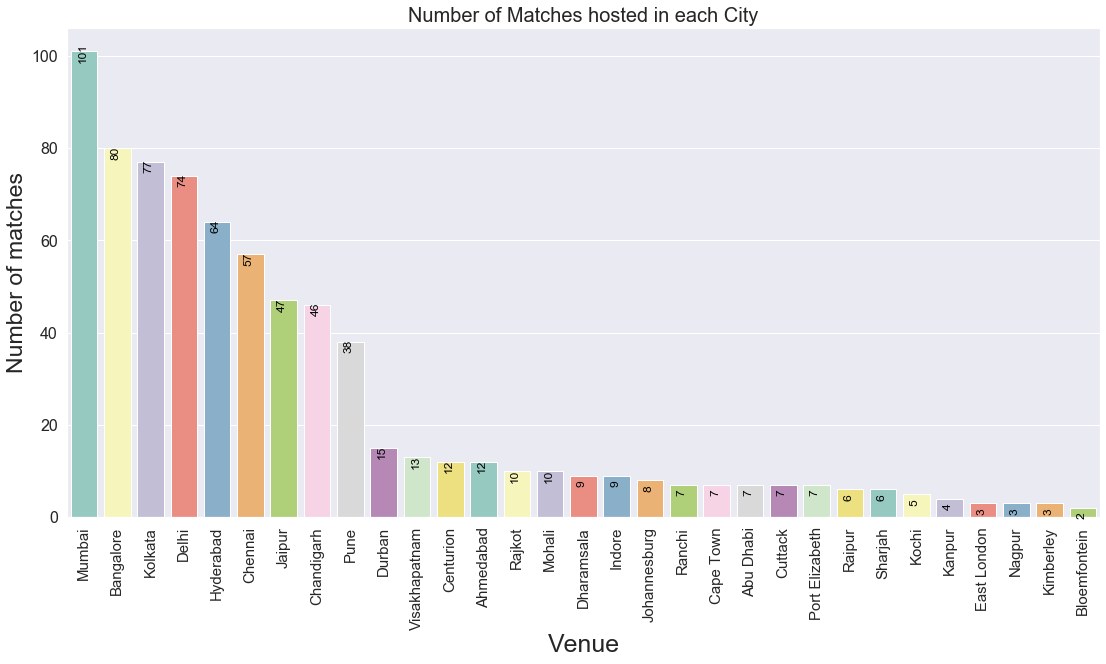

In [14]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
ig=plt.gcf()
fig.set_size_inches(18.5,9)
sns.countplot(dm['city'],order=dm['city'].value_counts().index,palette='Set3')
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=16)
plt.xlabel('Venue',fontsize=25)
plt.ylabel('Number of matches',fontsize=23)
plt.title('Number of Matches hosted in each City',fontsize=20)
count=0
cities=pd.DataFrame(dm['city'].value_counts())
cities['name']=dm['city'].value_counts().index
for i in cities['city']:
    plt.text(count-0.2,i-2,str(i),rotation=90,color='black',size=12)
    count+=1
plt.show()


Mumbai city has highest number of matches held in IPL(2008-2019)  followed by cities like Bangalore, Kolkata and Delhi that are also favourable for IPL hosting.

### 4.2.A Number of matches hosted at each stadium

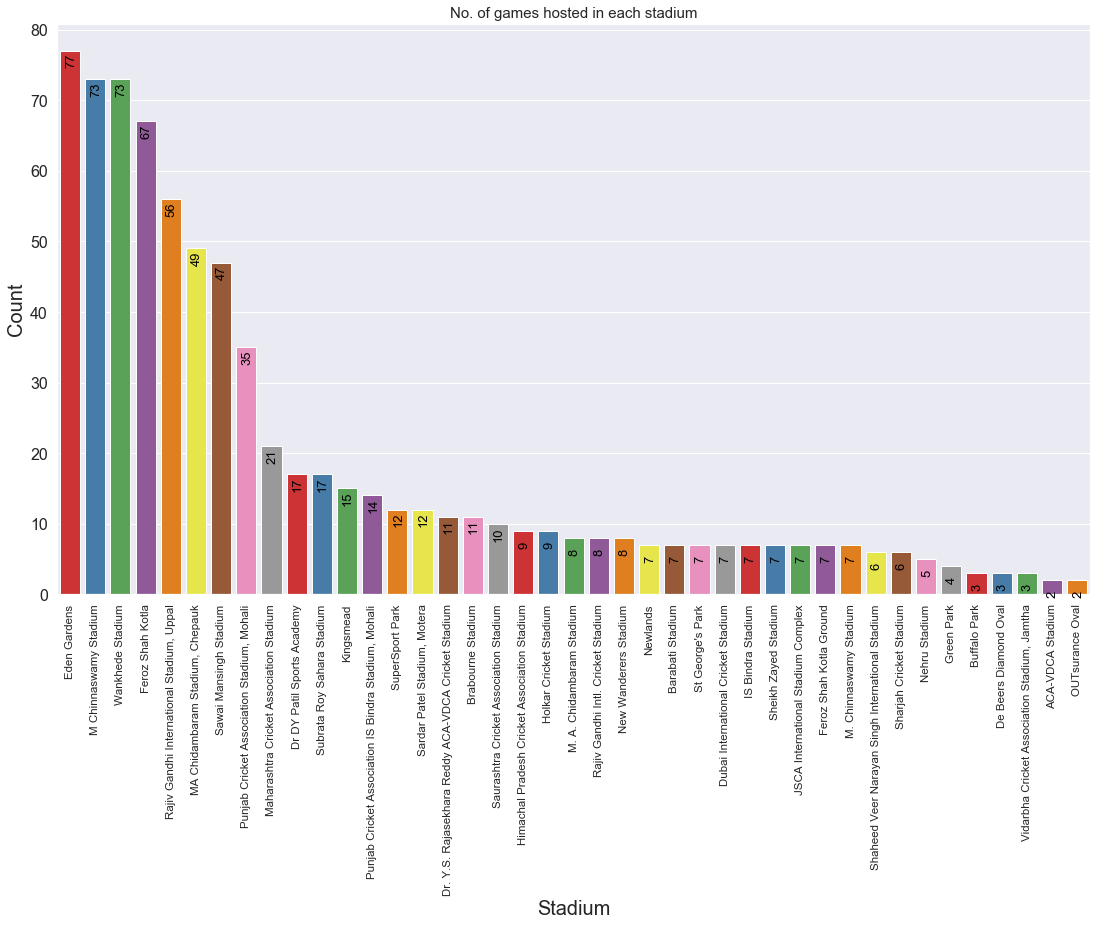

In [15]:
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
sns.countplot(dm['venue'],order=dm['venue'].value_counts().index,palette='Set1')
plt.xticks(rotation=90,fontsize=11.5)
plt.yticks(fontsize=16)
plt.xlabel('Stadium',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('No. of games hosted in each stadium',fontsize=15)
count=0
venues=pd.DataFrame(dm['venue'].value_counts())
venues['name']=dm['venue'].value_counts().index
for i in venues['venue']:
    plt.text(count-0.2,i-2,str(i),rotation=90,color='black',size=13)
    count+=1
plt.show()


* Above Bar graphs states that Eden Gardens(Kolkata) stadium has hosted highest number of matches in IPL that any other stadiums in India.
*    Wankhede stadium and M Chinanaswamy stadium shares same number of matches(73).
 

*   Since moslty eliminators, qualifiers and final of each season was held in IPL.







### 4.2.B Alternative Method for number of matches in each stadium

In [16]:
venue_dm=dm.groupby('venue').count()[['id']].reset_index()

data = [{"x": venue_dm['venue'] ,"y": venue_dm['id'], 
          "marker": {"color": "dodgerblue", "size": 12},
         "line": {"color": "darkred","width" : 2,"dash" : 'dash'},
          "mode": "markers+lines", "name": "Women", "type": "scatter"}]

layout = {"title": "Stadiums and Matches", 
          "xaxis": {"title": "Stadiums", }, 
          "yaxis": {"title": "Matches Played"},
          "autosize":False,"width":900,"height":1000,
          "margin": go.layout.Margin(l=34, r=0,b=100,t=50,pad=0)}

fig = go.Figure(data=data, layout=layout)
iplot(fig)

The Graph information can be seen by just hovering the mouse over the circle which represents the stadium information.

### 4.3.A Total number of matches between 2008-2018

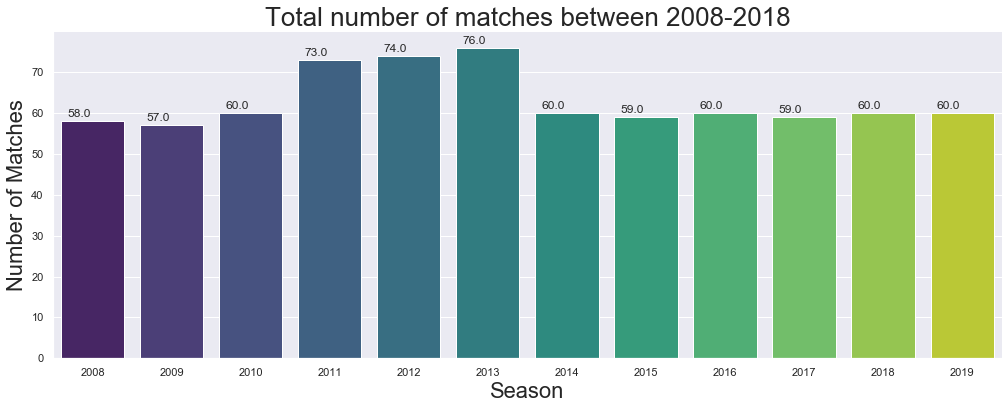

In [17]:
total_num_of_matches = dm.groupby('season')['id'].count()
plt.figure(figsize=(17,6))
ax = sns.countplot("season", data = dm, palette='viridis')
plt.title('Total number of matches between 2008-2018',fontsize=26)
plt.xlabel('Season',fontsize=22)
plt.ylabel('Number of Matches',fontsize=22)
annot_plot(ax,0.08,1)
plt.show()


* This figures shows that in 2013 highest number of matches have been played while after 2013 the number of matches have been slightly reducing. 
* Moreover there are 10 teams in 2011, 9 in 2012 and 2013 which gave rise to number of matches and RR and CSK were banned in 2015 for 2 years.

### 4.3.B Alternative option: iplot for hovering the data on the graph

In [18]:
data = [go.Histogram(x=dm['season'], marker=dict(color='#008B8B'),opacity=0.75)]
layout = go.Layout(title='Matches In Every Season ',xaxis=dict(title='Season',tickmode='linear'),yaxis=dict(title='Count'),bargap=0.2)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

### 4.4 Total matches won by teams

In [19]:
#calculating the matches played and won by each team
matches_played=pd.concat([dm['team1'],dm['team2']])
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=['Team','Total Matches']
matches_played['wins']=dm['winner'].value_counts().reset_index()['winner']

matches_played.set_index('Team',inplace=True)

### 4.4.A Matches played,Wins and Win Percentage

In [20]:
#iplot graph
#The combined data of the matches played by each team,no. of wins with wining percentage.
trace1 = go.Bar(x=matches_played.index,y=matches_played['Total Matches'],
                name='Total Matches',opacity=0.4)

trace2 = go.Bar(x=matches_played.index,y=matches_played['wins'],
                name='Matches Won',marker=dict(color='darkred'),opacity=0.4)

trace3 = go.Bar(x=matches_played.index,
               y=(round(matches_played['wins']/matches_played['Total Matches'],3)*100),
               name='Win Percentage',opacity=0.6,marker=dict(color='green'))

data = [trace1, trace2, trace3]

layout = go.Layout(title='Match Played, Wins And Win Percentage',xaxis=dict(title='Team'),
                   yaxis=dict(title='Count'),bargap=0.2,bargroupgap=0.1)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

* The above Bar Graph shows Rising Pune Supergiant and Delhi Capitals have highest number of Winning percentage(62.5) followed by Mumbai Indians(58.3).   
* Mumbai Indians have played most number of matches(187) followed by Royal Challenger Banglore (180).
*  MI is at top in winning matches and KXIP is at last.

### 4.4.B Alternative method for matches won i.e normal graph

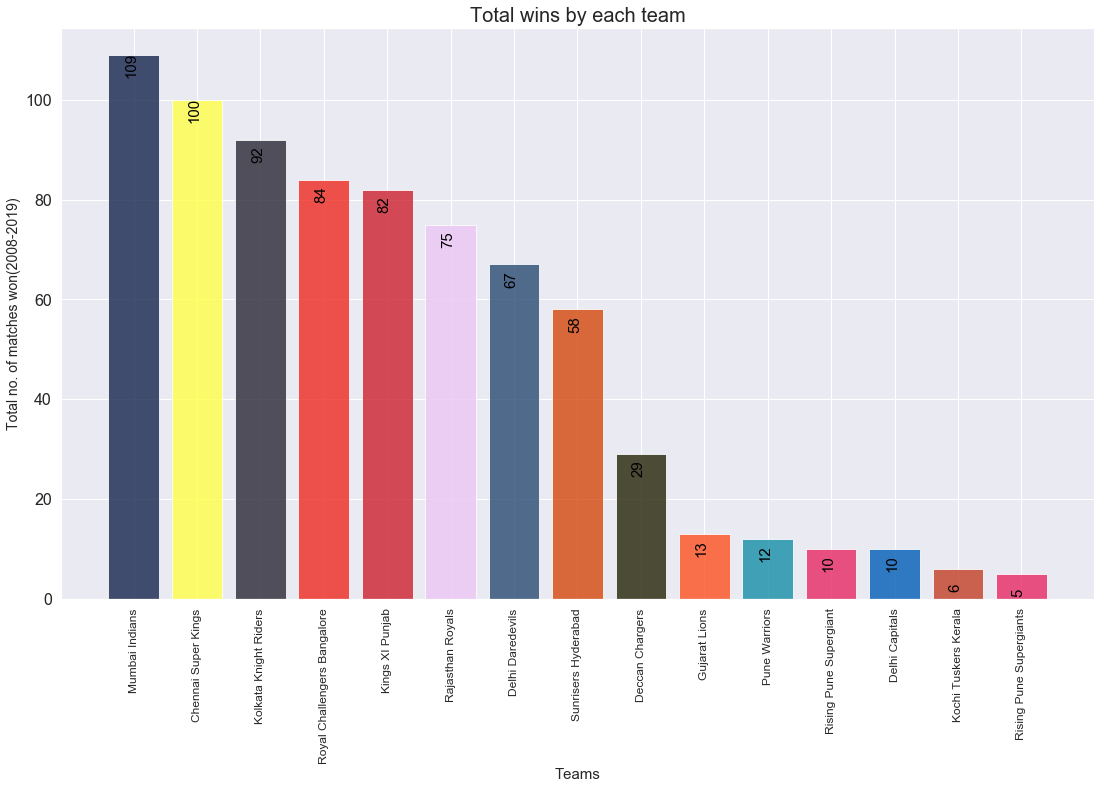

In [21]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
wins=pd.DataFrame(dm['winner'].value_counts())
wins['name']=wins.index
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.bar(wins['name'],
        wins['winner'],
        color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2',
               '#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865',
               '#005DB7','#C23E25','#E82865']
        ,alpha=0.8)
count=0
for i in wins['winner']:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
    count+=1
plt.title('Total wins by each team',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Total no. of matches won(2008-2019)',fontsize=14)
plt.show()

Mumbai Indians have highest number of wins (100)  throughout the IPL followed by Chennai Super Kings(100) 

### 4.5 Most Popular and highest number of umpire in IPL

In [22]:
ump=pd.concat([dm['umpire1'],dm['umpire2']])
ump=ump.value_counts()
umps=ump.to_frame().reset_index()

In [23]:
data = [go.Bar(x=umps['index'],y=umps[0],marker=dict(color='gold'),opacity=1)]

layout = go.Layout(title='Umpires in Matches',
                   yaxis=dict(title='Matches'),bargap=0.2)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

S. Ravi has been the most popular umpire and did umpiring for almost 106 matches followed by HDPK Dharmasena upmiring for 87 matches.

### Graphs for all the season winners:

Method 1

In [24]:
#Initialization
max_times_winner = dm.groupby('season')['winner'].value_counts()

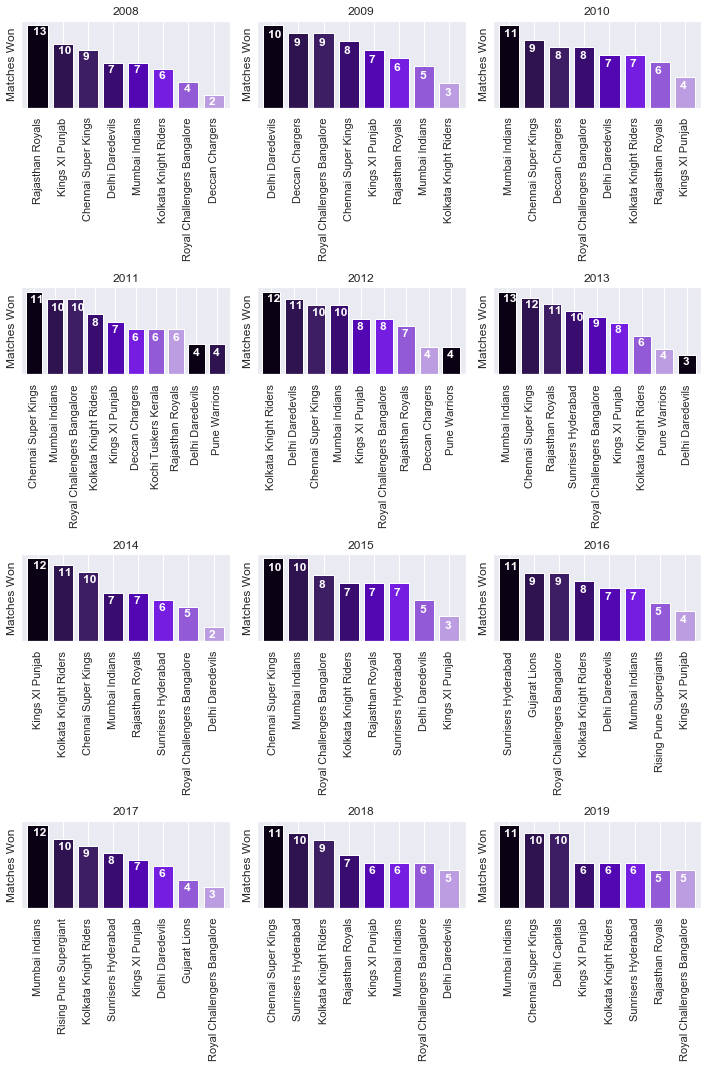

In [25]:
#plotting the graph
groups = max_times_winner.groupby('season')
fig = plt.figure()
count = 1

for year, group in groups:
    ax = fig.add_subplot(4,3,count)
    ax.set_title(year)
    ax = group[year].plot.bar(figsize = (10,15), width = 0.8,color=['#0A0214','#2E1350','#3D1E64','#390C70','#5307B2','#751DE1','#925AD7','#BC9DE2'])
    
    count+=1;
    
    plt.xlabel('')
    plt.yticks([])
    plt.ylabel('Matches Won')
    
    total_of_matches = []
    for i in ax.patches:
        total_of_matches.append(i.get_height())
    total = sum(total_of_matches)
    
    for i in ax.patches:
        ax.text(i.get_x()+0.2, i.get_height()-1.5,s= i.get_height(),color="white",fontweight='bold')
plt.tight_layout()
plt.show()

* Each small Graph shows the number of wins by each team in a specified season. 
* This is very good form of visulazation for comparing the team performance in each season.

# 5. Runs per season

### 5.1 Average and Total Runs

In [26]:
#calculation for average runs per match by grouping total runs of each season and dividing by matches of each season 
batsmen = dm[['id','season']].merge(dd, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()

avgruns_each_season=dm.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns={'id':'matches'},inplace=1)
avgruns_each_season['total_runs']=season['total_runs']
avgruns_each_season['average_runs_per_match']=avgruns_each_season['total_runs']/avgruns_each_season['matches']

In [27]:
fig = {"data" : [{"x" : season["season"],"y" : season["total_runs"],
                  "name" : "Total Run","marker" : {"color" : "lightblue","size": 12},
                  "line": {"width" : 3},"type" : "scatter","mode" : "lines+markers" },
        
                 {"x" : season["season"],"y" : avgruns_each_season["average_runs_per_match"],
                  "name" : "Average Run","marker" : {"color" : "brown","size": 12},
                  "type" : "scatter","line": {"width" : 3},"mode" : "lines+markers",
                  "xaxis" : "x2","yaxis" : "y2",}],
       
        "layout" : {"title": "Total and Average run per Season",
                    "xaxis2" : {"domain" : [0, 1],"anchor" : "y2",
                    "showticklabels" : False},"margin" : {"b" : 111},
                    "yaxis2" : {"domain" : [.55, 1],"anchor" : "x2","title": "Average Run"},                    
                    "xaxis" : {"domain" : [0, 1],"tickmode":'linear',"title": "Year"},
                    "yaxis" : {"domain" :[0, .45], "title": "Total Run"}}}

iplot(fig)

We see the peak at 2012 and 2013 the highest number of Total runs this is beacuse there is increase in number of matches.

### 5.2 Run Distribution Over Years

In [28]:
#Grouping by batsmen runs which have made by either 6 or 4 or 1's 
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
fours=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(fours,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})

In [29]:
Season_boundaries['6"s'] = Season_boundaries['6"s']*6
Season_boundaries['4"s'] = Season_boundaries['4"s']*4
Season_boundaries['total_runs'] = season['total_runs']

In [30]:
# 3 traces for each of the category combined in a bar graph
trace1 = go.Bar(
    x=Season_boundaries['season'],
    y=Season_boundaries['total_runs']-(Season_boundaries['6"s']+Season_boundaries['4"s']),
    name='Remaining runs',opacity=0.6)

trace2 = go.Bar(
    x=Season_boundaries['season'],
    y=Season_boundaries['4"s'],
    name='Run by 4"s',opacity=0.7)

trace3 = go.Bar(
    x=Season_boundaries['season'],
    y=Season_boundaries['6"s'],
    name='Run by 6"s',opacity=0.7)


data = [trace1, trace2, trace3]
layout = go.Layout(title="Run Distribution per year",barmode='stack',xaxis = dict(tickmode='linear',title="Year"),
                                    yaxis = dict(title= "Run Distribution"))

fig = go.Figure(data=data, layout=layout)
iplot(fig)

* From 2008-2019 the number of highest runs made by 6's (5214) is in the year 2018.
* Highest runs made by 4's is 8216 runs made in the year 2013.
* The runs made by singles, doubles or extras is highest in the year 2012 (10.41k)

### 5.3.Target of 200 Runs or More

In [31]:
high_scores=dd.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
high_scores=high_scores[high_scores['total_runs']>=200]
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,Royal Challengers Bangalore,Pune Warriors,263
1370,7937,1,Kolkata Knight Riders,Kings XI Punjab,250
1250,620,1,Royal Challengers Bangalore,Gujarat Lions,248
416,206,1,Chennai Super Kings,Rajasthan Royals,246
1498,11338,1,Kolkata Knight Riders,Mumbai Indians,241
122,61,1,Chennai Super Kings,Kings XI Punjab,240
1134,562,1,Royal Challengers Bangalore,Mumbai Indians,235
1426,11147,1,Sunrisers Hyderabad,Royal Challengers Bangalore,233
596,296,1,Kings XI Punjab,Royal Challengers Bangalore,232
1500,11339,1,Sunrisers Hyderabad,Kings XI Punjab,232


The Highest target has been set by RCB of 263 runs against Pune Warriors.

In [32]:
high_scores=high_scores[high_scores.batting_team != 'GL']
high_scores=high_scores[high_scores.bowling_team != 'RPS']
high_scores=high_scores[high_scores.bowling_team != 'GL']
high_scores=high_scores[high_scores.bowling_team != 'PW']

### 5.4 How many times each Team scored > 200

In [33]:
high_scores=high_scores.groupby(['inning','batting_team']).count().reset_index()
high_scores.drop(["bowling_team","total_runs"],axis=1,inplace=True)
high_scores.rename(columns={"match_id":"total_times"},inplace=True)

high_scores_1 = high_scores[high_scores['inning']==1]
high_scores_2 = high_scores[high_scores['inning']==2]

In [34]:
high_scores_1.sort_values(by = 'total_times',ascending=False).head()


,inning,batting_team,total_times
9,1,Royal Challengers Bangalore,16
0,1,Chennai Super Kings,11
7,1,Mumbai Indians,10
5,1,Kings XI Punjab,9
6,1,Kolkata Knight Riders,9


The table shows number of times each time has scored above 200 runs in the 1st Innings.

In [35]:
high_scores_2.sort_values(by = 'total_times',ascending=False).head()

,inning,batting_team,total_times
11,2,Chennai Super Kings,6
13,2,Kings XI Punjab,6
15,2,Mumbai Indians,4
14,2,Kolkata Knight Riders,3
16,2,Rajasthan Royals,3


Number of times each team which have scored above 200 in the 2nd Innings. 

In [36]:
trace1 = go.Bar(x=high_scores_1['batting_team'],y=high_scores_1['total_times'],name='Ist Innings')
trace2 = go.Bar(x=high_scores_2['batting_team'],y=high_scores_2['total_times'],name='IInd Innings')

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('At Ist Innings','At IInd Innings'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

iplot(fig)

* RCB has highest number of scoring 200+ followed by CSK.
* While chasing CSK and KXIP have highest number of scroing 200+.

### 5.5 Is it possible to chase >200 Target

In [37]:
high_scores=dd.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores1=high_scores[high_scores['inning']==1]
high_scores2=high_scores[high_scores['inning']==2]
high_scores1=high_scores1.merge(high_scores2[['match_id','inning', 'total_runs']], on='match_id')
high_scores1.rename(columns={'inning_x':'inning_1','inning_y':'inning_2','total_runs_x':'inning1_runs','total_runs_y':'inning2_runs'},inplace=True)
high_scores1=high_scores1[high_scores1['inning1_runs']>=200]
high_scores1['is_score_chased']=1
high_scores1['is_score_chased'] = np.where(high_scores1['inning1_runs']<=high_scores1['inning2_runs'], 'yes', 'no')

In [38]:
slices=high_scores1['is_score_chased'].value_counts().reset_index().is_score_chased
list(slices)
labels=['No','Yes']

In [39]:
trace0 = go.Pie(labels=labels, values=slices,
              hoverinfo='label+value')

layout=go.Layout(title='200 score chased ?')
fig = go.Figure(data=[trace0], layout=layout)
iplot(fig)

* In a format like t20 it's very hard for a team to score 200+ score runs in just 120 balls.
* From the results it states that only 17.3% of matches can achieve 200+ score.

# 6 Power play analysis

Powerplay is of starting 6 overs in t20 matches
During the first six overs, a maximum of two fielders can be outside the 30-yard circle.

### 6.1 1st Innings V/S 2nd Innnings

In [40]:
season=dm[['id','season','winner']]
complete_data=dd.merge(season,how='inner',left_on='match_id',right_on='id')

In [41]:
powerplay_data=complete_data[complete_data['over']<=6]

inn1 = powerplay_data[ powerplay_data['inning']==1].groupby('match_id')['total_runs'].agg(['sum']).reset_index()
inn2 = powerplay_data[ powerplay_data['inning']==2].groupby('match_id')['total_runs'].agg(['sum']).reset_index()

In [42]:
inn1.reset_index(inplace=True)
inn1.drop(["match_id"],axis=1,inplace=True)

inn2.reset_index(inplace=True)
inn2.drop(["match_id"],axis=1,inplace=True)

In [43]:
fig = {"data" : [{"x" : inn1["index"],"y" : inn1["sum"],"marker" : {"color" : "blue","size": 2},
                  "line": {"width" : 1.5},"type" : "scatter","mode" : "lines" },
        
                 {"x" : inn2["index"],"y" : inn2["sum"],"marker" : {"color" : "brown","size": 2},
                  "type" : "scatter","line": {"width" : 1.5},"mode" : "lines",
                  "xaxis" : "x2","yaxis" : "y2",}],
       
        "layout" : {"title": "Inning 1 vs Inning 2 in Powerplay Overs",
                    "xaxis2" : {"domain" : [0, 1],"anchor" : "y2",
                    "showticklabels" : False},
                    "yaxis2" : {"domain" : [.55, 1],"anchor" : "x2","title": "Inn2 Powerplay"},
                    "margin" : {"b" : 111},
                    "xaxis" : {"domain" : [0, 1],"title": "Matches"},
                    "yaxis" : {"domain" :[0, .45], "title": "Inn1 Poweplay"}}}

iplot(fig)

### 6.2 PowerPlay average runs per year

In [44]:
pi1=powerplay_data[ powerplay_data['inning']==1].groupby(['season','match_id'])['total_runs'].agg(['sum'])
pi1=pi1.reset_index().groupby('season')['sum'].mean()
pi1=pi1.to_frame().reset_index()

pi2=powerplay_data[ powerplay_data['inning']==2].groupby(['season','match_id'])['total_runs'].agg(['sum'])
pi2=pi2.reset_index().groupby('season')['sum'].mean()
pi2=pi2.to_frame().reset_index()

In [45]:
trace1 = go.Bar(x=pi1.season,y=pi1["sum"],
                name='Inning 1',opacity=0.4)

trace2 = go.Bar(x=pi2.season,y=pi2["sum"],name='Inning 2',
                marker=dict(color='red'),opacity=0.4)

data = [trace1, trace2]
layout = go.Layout(title='Powerplay Average runs per Year',
                   xaxis=dict(title='Year',tickmode='linear'),
                   yaxis=dict(title='Run'),bargap=0.2,bargroupgap=0.1)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

* It is seen that in the 2nd Innings the average powerplay runs is more than the 1st innings.
* This hike can be due to pressure of the target that has been set by the opposite team.

### 6.3 Dismissals in PowerPlay

In [46]:
powerplay_dismissals=powerplay_data.dropna(subset=['dismissal_kind']).groupby(['season','match_id','inning'])['dismissal_kind'].agg(['count']).reset_index().groupby('season')['count'].max()
powerplay_dismissals=powerplay_dismissals.reset_index()

powerplay_dismissals_first=powerplay_data[ powerplay_data['inning']==1].dropna(subset=['dismissal_kind']).groupby(['season','match_id','inning'])['dismissal_kind'].agg(['count']).reset_index().groupby('season')['count'].mean()
powerplay_dismissals_first=powerplay_dismissals_first.reset_index()

powerplay_dismissals_second=powerplay_data[ powerplay_data['inning']==2].dropna(subset=['dismissal_kind']).groupby(['season','match_id','inning'])['dismissal_kind'].agg(['count']).reset_index().groupby('season')['count'].mean()
powerplay_dismissals_second=powerplay_dismissals_second.reset_index()

In [47]:
trace1 = go.Bar(x=powerplay_dismissals.season,y=powerplay_dismissals["count"],
                name='Max',opacity=0.4)

trace2 = go.Bar(x=powerplay_dismissals_first.season,y=powerplay_dismissals_first["count"],name='Inning 1',
                marker=dict(color='red'),opacity=0.4)

trace3 = go.Bar(x=powerplay_dismissals_second.season,y=powerplay_dismissals_second["count"],name='Inning 2',
                marker=dict(color='lime'),opacity=0.4)

data = [trace1, trace2, trace3]
layout = go.Layout(title='Powerplay Average Dismissals per Year',
                   xaxis=dict(title='Year',tickmode='linear'),
                   yaxis=dict(title='Run'),bargap=0.2,bargroupgap=0.1)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

* From the analysis of dismissals it is clear that strategy of each team has been consistent from 2013-2017 because the average dismissals are same.
* The maximum dismissals in PowerPlay can be in year 2019 which is 7.
* Comaparing to 1st innings and 2nd innings we can see that fall of wickets take place more in 2nd innings than 1st. 

# 7.Batsman Analysis and Data

In [48]:
df_strike_rate = dd.groupby(['batsman']).agg({'ball':'count','batsman_runs':'mean'}).sort_values(by='batsman_runs',ascending=False)
df_strike_rate.rename(columns ={'batsman_runs' : 'strike rate'}, inplace=True)
df_runs_per_match = dd.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
df_total_runs = df_runs_per_match.groupby(['batsman']).agg({'sum' ,'mean','count'})
df_total_runs.rename(columns ={'sum' : 'batsman run','count' : 'match count','mean' :'average score'}, inplace=True)
df_total_runs.columns = df_total_runs.columns.droplevel()
df_sixes = dd[['batsman','batsman_runs']][dd.batsman_runs==6].groupby(['batsman']).agg({'batsman_runs':'count'})
df_four = dd[['batsman','batsman_runs']][dd.batsman_runs==4].groupby(['batsman']).agg({'batsman_runs':'count'})
df_batsman_stat = pd.merge(pd.merge(pd.merge(df_strike_rate,df_total_runs, left_index=True, right_index=True),df_sixes, left_index=True, right_index=True),df_four, left_index=True, right_index=True)

In [49]:
df_batsman_stat.rename(columns = {'ball' : 'ball', 'strike rate':'strike_rate','batsman run' : 'batsman_run',
                                  'match count' : 'match_count','average score' : 'average_score' ,'batsman_runs_x' :'six',
                                  'batsman_runs_y':'four'},inplace=True)
df_batsman_stat['strike_rate'] = df_batsman_stat['strike_rate']*100
df_batsman_stat.sort_values(by='batsman_run',ascending=False,inplace=True)
#df_batsman_stat.sort_values(by='batsman_run',ascending=False)
df_batsman_stat.reset_index(inplace=True)

### 7.1 Highest Average and Strike rate for >50 Matches

In [50]:
average_score=df_batsman_stat.sort_values(by='average_score',ascending=False)
average_score=average_score[average_score['match_count']>50].head(10)

strike_rate=df_batsman_stat.sort_values(by='strike_rate',ascending=False)
strike_rate=strike_rate[strike_rate['match_count']>50].head(10)

In [51]:
trace1 = go.Bar(x=average_score['batsman'],y=average_score['average_score'],
                name='Average Score',marker=dict(color='gold'),opacity=0.6,showlegend=False)

trace2 = go.Bar(x=strike_rate['batsman'],y=strike_rate['strike_rate'],
                name='Strike Rate',marker=dict(color='brown'),opacity=0.6,showlegend=False)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Highest Average Score','Highest Strike Rate'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

fig['layout']['xaxis1'].update(title='Player')
fig['layout']['xaxis2'].update(title='Player')

iplot(fig)

* When it comes to consistent and power players, names like **Warner, Gayle** comes to our mind.
* The blast of boundaries can be done only West Indies players like **Russel, Narine, Maxi, Pandya**.


### 7.2 Top 20 Batsman

In [52]:
top_df_batsman=df_batsman_stat.head(20)
top_df_batsman

,batsman,ball,strike_rate,batsman_run,match_count,average_score,six,four
0,V Kohli,4211,129.042983,5434,169,32.153846,191,482
1,SK Raina,4044,133.902077,5415,189,28.650794,195,495
2,RG Sharma,3816,128.773585,4914,182,27.000000,194,431
3,DA Warner,3398,139.523249,4741,126,37.626984,181,459
4,S Dhawan,3776,122.669492,4632,158,29.316456,96,526
5,CH Gayle,3131,145.640370,4560,124,36.774194,327,376
6,MS Dhoni,3318,134.930681,4477,170,26.335294,207,297
7,RV Uthappa,3492,127.319588,4446,170,26.152941,156,436
8,AB de Villiers,2977,148.740343,4428,142,31.183099,214,357
9,G Gambhir,3524,119.835414,4223,151,27.966887,59,492


In [53]:
data=[{"y": top_df_batsman.match_count,
        "x": top_df_batsman.batsman,
        "mode":"markers",
        "marker":{"color":top_df_batsman.six,"size" :top_df_batsman.average_score,'showscale': True},
        "text":top_df_batsman.batsman }]

iplot(data)

* Virat Kohli has highest total runs across all seasons. 
* Gayle has hit highest number of 6's across the IPL with a total of 327 sixes.
* SK Raina has hit the highest number of 4's in IPL with whopping total of 495 fours.
* Warner has been the best player in last 3-4 years of IPL with playing only 126 matches comapared to Virat kohli(169)
* Average Score and 6"s by Parthiv Patel is lowest among top 20 batsmen

### 7.3 Top 10 Batsman in each run category

In [54]:
toppers=dd.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
toppers=toppers.pivot('batsman','batsman_runs','total_runs')
toppers.reset_index(inplace=True)

In [55]:
top_6 = toppers.sort_values(6,ascending=False).head(10)
top_4 = toppers.sort_values(4,ascending=False).head(10)
top_2 = toppers.sort_values(2,ascending=False).head(10)
top_1 = toppers.sort_values(1,ascending=False).head(10)

In [56]:
trace1 = go.Scatter(x=top_6.batsman,y =top_6[6],name='6"s',marker =dict(color= "blue",size = 9),line=dict(width=2,dash='dash'))
trace2 = go.Scatter(x=top_4.batsman,y = top_4[4],name='4"s',marker =dict(color= "orange",size = 9),line=dict(width=2,dash='longdash'))
trace3 = go.Scatter(x=top_2.batsman,y = top_2[2],name='2"s',marker =dict(color= "green",size = 9),line=dict(width=2,dash='dashdot'))
trace4 = go.Scatter(x=top_1.batsman,y = top_1[1],name='1"s',marker =dict(color= "red",size = 9),line=dict(width=2,dash='longdashdot'))

fig = tools.make_subplots(rows=4, cols=1, subplot_titles=('Top 6"s Scorer','Top 4"s Scorer',
                                                          'Top 2"s Scorer','Top 1"s Scorer'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)
fig.append_trace(trace4, 4, 1)

fig['layout'].update(title='Top Scorer in each Category',showlegend=False)
iplot(fig)

* The difference between Galye(1st) and ABD Villiers(2nd) in terms of sixes is 113 sixes.
* Top 4's, 2's, 1's it can be seen that top 3 players are mostly Indians.

### 7.4 Man Of The Match

In [57]:
s_man_of_match = (dm.groupby(dm.player_of_match).player_of_match.count().
                  sort_values(ascending=False).head(15))

df_man_of_match =(s_man_of_match.to_frame().rename
                  (columns = {"player_of_match": "times"}).reset_index())

In [58]:
data = [go.Bar(x=df_man_of_match['player_of_match'], 
               y=df_man_of_match["times"], 
               marker=dict(color='#4B0082'),opacity=0.75)]

layout = go.Layout(title='Man of the Matches ',
                   xaxis=dict(title='Player',tickmode='linear'),
                   yaxis=dict(title='Count'),bargap=0.2)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

* NO doubt the best players of IPL have won the most number of Man of the Match awards, Gayle(21) followed by ABD Villiers(20).
* Mahi won 17 times the Man of Match award.


### 7.5 Centuries and half centuries analysis

In [59]:
cen = dd.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
cen = cen[cen['batsman_runs']>=100]
cen = cen.groupby(['batsman']).agg({'count'})
cen.columns = cen.columns.droplevel()
cen = cen.sort_values(by='count',ascending=False).reset_index()

half_cen = dd.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
half_cen = half_cen[half_cen['batsman_runs']>=50]
half_cen = half_cen[half_cen['batsman_runs']<100]
half_cen = half_cen.groupby(['batsman']).agg({'count'})
half_cen.columns = half_cen.columns.droplevel()
half_cen = half_cen.sort_values(by='count',ascending=False).reset_index()

df_big = pd.merge(cen,half_cen, on='batsman',how='right')
df_big = df_big.fillna(0)

df_strike_rate = dd.groupby(['batsman']).agg({'ball':'count','batsman_runs':'mean'}).sort_values(by='batsman_runs',ascending=False)
df_strike_rate.rename(columns ={'batsman_runs' : 'strike rate'}, inplace=True)

df_runs_per_match = dd.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
df_total_runs = df_runs_per_match.groupby(['batsman']).agg({'sum' ,'mean','count'})
df_total_runs.rename(columns ={'sum' : 'batsman run','count' : 'match count','mean' :'average score'}, inplace=True)
df_total_runs.columns = df_total_runs.columns.droplevel()

df_sixes = dd[['batsman','batsman_runs']][dd.batsman_runs==6].groupby(['batsman']).agg({'batsman_runs':'count'})
df_four = dd[['batsman','batsman_runs']][dd.batsman_runs==4].groupby(['batsman']).agg({'batsman_runs':'count'})

df_batsman_stat = pd.merge(pd.merge(pd.merge(df_strike_rate,df_total_runs, left_index=True, right_index=True),
                                    df_sixes, left_index=True, right_index=True),df_four, left_index=True, right_index=True)

df_batsman_stat.rename(columns = {'ball' : 'Ball', 'strike rate':'Strike Rate','batsman run' : 'Batsman Run','match count' : 'Match Count',
                                  'average score' : 'Average score' ,'batsman_runs_x' :'Six','batsman_runs_y':'Four'},inplace=True)
df_batsman_stat['Strike Rate'] = df_batsman_stat['Strike Rate']*100
df_batsman_stat = df_batsman_stat.sort_values(by='Batsman Run',ascending=False).reset_index()

batsman_stats = pd.merge(df_batsman_stat,df_big, on='batsman',how='left').fillna(0)
batsman_stats.rename(columns = {'count_x' : '100s', 'count_y' : '50s'},inplace=True)

In [60]:
centuries = batsman_stats.sort_values(by='100s').tail(15)
half_centuries = batsman_stats.sort_values(by='50s').tail(15)

In [61]:
fig = {"data" : [{"x" : centuries["batsman"],"y" : centuries["100s"],
                  "name" : "100s","marker" : {"color" : "lightblue","size": 12},
                  "line": {"width" : 3},"type" : "scatter","mode" : "lines+markers" ,
                  "xaxis" : "x1","yaxis" : "y1"},
        
                 {"x" : half_centuries["batsman"],"y" : half_centuries["50s"],
                  "name" : "50s","marker" : {"color" : "brown","size": 12},
                  "type" : "scatter","line": {"width" : 3},"mode" : "lines+markers",
                  "xaxis" : "x2","yaxis" : "y2"}],
       
        "layout" : {"title": "Total centuries and half-centuries by top batsman",
                    "xaxis2" : {"domain" : [0, 1],"anchor" : "y2",
                    "showticklabels" : True},"margin" : {"b" : 111},
                    "yaxis2" : {"domain" : [.55, 1],"anchor" : "x2","title": "50s"},                    
                    "xaxis" : {"domain" : [0, 1],"tickmode":'linear',"title": "Batsman"},
                    "yaxis" : {"domain" :[0, .45], "anchor" : "x2","title": "100s"}}}

iplot(fig)

* D Warner has highest number of half centuries(44) and 4 centuries in his entire IPL career.
* Not to mention the highest number of centuries belong to none other than Gayle


In [62]:
cen = batsman_stats[['100s','50s','batsman']]
cen['points'] = (cen['100s']*8) + (cen['50s']*4)
cen.sort_values(by='points',inplace=True,ascending=False)

In [63]:
trace = go.Table(
    domain=dict(x=[0, 0.55],
                y=[0, 1.0]),
    header=dict(values=["Batsman","Points","100s","50s"],
                fill = dict(color = '#2F4F4F'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[cen['batsman'].head(10), cen['points'].head(10), cen['100s'].head(10), cen['50s'].head(10)],
               fill = dict(color = ['#D3D3D3', 'white']),
               align = ['center']))

trace1 = go.Bar(x=cen['batsman'].head(10),
                y=cen["points"].head(10),
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='midnightblue'),opacity=0.60)
layout = dict(
    width=830,
    height=425,
    autosize=False,
    title='Batsman with highest points by centuries and half centuries',
    margin = dict(t=100),
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.65, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)

fig1 = dict(data=[trace,trace1], layout=layout)
iplot(fig1)

D Warner, Kohli, Gayle, ABD Villiers no doubt are best players of t20 format.

### 7.6 Boundaries and Total runs Analysis

In [64]:
fours = batsman_stats.sort_values(by='Four').tail(15)
sixes = batsman_stats.sort_values(by='Six').tail(15)
runs = batsman_stats.sort_values(by='Batsman Run').tail(15)

In [65]:
trace1 = go.Scatter(x=sixes.batsman,y =sixes.Six,name='6"s',marker =dict(color= "blue",size = 9),line=dict(width=2,dash='dash'),showlegend=True)
trace2 = go.Scatter(x=fours.batsman,y = fours.Four,name='4"s',marker =dict(color= "green",size = 9),line=dict(width=2,dash='longdash'))
trace3 = go.Scatter(x=runs.batsman,y = runs['Batsman Run'],name='2"s',marker =dict(color= "red",size = 9),line=dict(width=2,dash='dashdot'))

fig = tools.make_subplots(rows=3, cols=1, subplot_titles=('Top 6"s Scorer','Top 4"s Scorer',"Highest total runs"), print_grid=False)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)

fig['layout'].update(height=700, width=820,title='Top Scorer in Boundaries and Total Runs',showlegend=False)
iplot(fig)

In [66]:
runs = batsman_stats[['Six','Four','Batsman Run','batsman']]
runs['point'] = (runs['Six']*1) + (runs['Four']*0.5) + (runs['Batsman Run']*0.5)
runs.sort_values(by='point',inplace=True,ascending=False)

In [67]:
trace = go.Table(
    domain=dict(x=[0, 0.55],
                y=[0, 1.0]),
    header=dict(values=[["Batsman"],["Points"],["Sixes"],["Fours"]],
                fill = dict(color='#9932CC'),
                font = dict(color='white', size=14),
                align = ['center'],
               height = 30),
    cells=dict(values=[runs['batsman'].head(10), runs['point'].head(10), runs['Six'].head(10), runs['Four'].head(10)],
               fill = dict(color = ['#EE82EE', 'white']),
               align = ['center']))

trace1 = go.Bar(x=runs['batsman'].head(10),
                y=runs["point"].head(10),
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='#c83349'),opacity=0.50)
layout = dict(
    width=830,
    height=425,
    autosize=False,
    title='Batsman with highest points by runs and boundaries',
    margin = dict(t=100),
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.61, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)

fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

In [68]:
final = pd.merge(cen,runs,on='batsman', how='inner')
final['total_points']=final['points']+final['point']
final['max'] = final['100s']+final['50s']

final.sort_values(by='total_points',ascending=False,inplace=True)
best_batsman = final[['batsman','total_points']]

In [69]:
final['Batsman Run'] = (final['Batsman Run'])/(final['Batsman Run'].max()/100)
final['Six'] = (final['Six'])/(final['Six'].max()/100)
final['Four'] = (final['Four'])/(final['Four'].max()/100)
final['max'] = (final['max'])/(final['max'].max()/100)
final['total_points'] = (final['total_points'])/(final['total_points'].max()/100)

In [70]:
x = final[final["batsman"] == "V Kohli"]
y = final[final["batsman"] == "CH Gayle"]
z = final[final["batsman"] == "S Dhawan"]

data = [go.Scatterpolar(
  r = [x['Four'].values[0],x['Six'].values[0],x['Batsman Run'].values[0],x['max'].values[0],x['total_points'].values[0]],
  theta = ['Four','Six','Runs','Centuries','Points'],
  fill = 'toself', opacity = 0.8,
  name = "V Kohli"),
        
    go.Scatterpolar(
  r = [y['Four'].values[0],y['Six'].values[0],y['Batsman Run'].values[0],y['max'].values[0],y['total_points'].values[0]],
  theta = ['Four','Six','Runs','Centuries','Points'],
  fill = 'toself',subplot = "polar2",
    name = "CH Gayle"),
       
    go.Scatterpolar(
  r = [z['Four'].values[0],z['Six'].values[0],z['Batsman Run'].values[0],z['max'].values[0],z['total_points'].values[0]],
  theta = ['Four','Six','Runs','Centuries','Points'],
  fill = 'toself',subplot = "polar3",
    name = "S Dhawan")]
layout = go.Layout(title = "Comparison Between V Kohli, CH Gayle, S Dhawan",
                   
                   polar = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [0, 0.25],y = [0, 1])),
                  
                   polar2 = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [0.35, 0.65],y = [0, 1])),
                  
                   polar3 = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [0.75, 1.0],y = [0, 1])),)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

The best batsmen in terms of average, 6's, 4's have been compared into 5 categories according to their strengths in each category.

### 7.7 Orange Cap Holders

In [71]:
orange=dm[['id','season']]
orange=orange.merge(dd,left_on='id',right_on='match_id',how='left')
orange=orange.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
orange=orange.sort_values('batsman_runs',ascending=0)
orange=orange.drop_duplicates(subset=["season"],keep="first")
#orange.sort_values(by='season')

In [72]:
data = [go.Bar(x=orange['season'].values,y=orange['batsman_runs'].values,
                name='Total Matches',text=orange['batsman'].values,
                marker=dict(color='rgb(255,140,0)',
                            line=dict(color='rgb(8,48,107)',width=1.5,)),opacity=0.7)]

layout = go.Layout(title='Orange-Cap Holders',xaxis = dict(tickmode='linear',title="Year"),
                   yaxis=dict(title='Runs'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

* David Warner won the Orange cap 3 times in the years 2015,2017,2019.
* Virat Kohli owned the Orange cap with highest runs made by any batsmen in IPL with 973 runs.
* Coincidence can be seen in year 2012 and 2013 that the total run made by Gayle and M.Hussey is exactly 733 runs.

# 8.Bowlers Analysis

In [73]:
condition_catch = (dd.dismissal_kind == 'caught')
condition_run= (dd.dismissal_kind == 'run out')
condition_stump= (dd.dismissal_kind == 'stumped')
condition_caught_bowled = (dd.dismissal_kind == 'caught and bowled')

s_catch = dd.loc[condition_catch,:].groupby(dd.fielder).dismissal_kind.count().sort_values(ascending=False)
s_run = dd.loc[condition_run,:].groupby(dd.fielder).dismissal_kind.count().sort_values(ascending=False)
s_stump = dd.loc[condition_stump,:].groupby(dd.fielder).dismissal_kind.count().sort_values(ascending=False)
s_caught_bowled = dd.loc[condition_caught_bowled,:].groupby(dd.bowler).dismissal_kind.count().sort_values(ascending=False)

df_catch= s_catch.to_frame().reset_index().rename(columns ={'dismissal_kind' : 'catch'})
df_run= s_run.to_frame().reset_index().rename(columns ={'dismissal_kind' : 'run_out'})
df_stump= s_stump.to_frame().reset_index().rename(columns ={'dismissal_kind' : 'stump'})
df_caught_bowled = s_caught_bowled.to_frame().reset_index().rename(columns ={'dismissal_kind' : 'caught and bowled'})                                                                                                                           
                                                                                                                           
df_field = pd.merge(pd.merge(df_catch,df_run,on='fielder', how='outer'),df_stump,on='fielder',how='outer')
field_stats = df_field[~df_field['fielder'].str.contains("(sub)")].reset_index().drop(['index'],axis=1).fillna(0)

In [74]:
condition = ((dd.dismissal_kind.notnull()) &(dd.dismissal_kind != 'run out')&
            (dd.dismissal_kind != 'retired hurt' )&(dd.dismissal_kind != 'hit wicket') 
            &(dd.dismissal_kind != 'obstructing the field')&(dd.dismissal_kind != 'caught and bowled'))
        
df_bowlers = dd.loc[condition,:].groupby(dd.bowler).dismissal_kind.count().sort_values(ascending=False).reset_index()
df_bowlers = pd.merge(df_bowlers,df_caught_bowled , on='bowler',how='left').fillna(0)

high=dd.groupby(['match_id', 'bowler']).agg({'total_runs':'sum'}).reset_index()

over_count=dd.groupby(['match_id', 'bowler','over']).agg({'total_runs':'sum'}).reset_index()
overs = over_count.groupby(['match_id','bowler']).agg({'over':'count'}).reset_index()
overs = overs[overs['over']>=2]

bowlers = pd.merge(high,overs,on=['match_id', 'bowler'], how='right')
bowlers['economy'] = bowlers['total_runs']/bowlers['over']
bowlers['eco_range'] = pd.cut(bowlers['economy'], [0, 4, 5, 6, 9, 10, 11, 30], labels=['below4', '4-5', '5-6', '6-9','9-10','10-11','above11'])

bowlers = pd.concat([bowlers,pd.get_dummies(bowlers['eco_range'], prefix='eco')],axis=1)
economy_rates=bowlers.groupby(['bowler']).agg({'eco_below4':'sum','eco_4-5':'sum','eco_5-6':'sum','eco_6-9':'sum','eco_9-10':'sum','eco_10-11':'sum','eco_above11':'sum'}).reset_index()

maiden_over = over_count[over_count['total_runs']==0]
maidens = maiden_over['bowler'].value_counts().to_frame().reset_index().rename({'index':'bowler','bowler':'maiden_overs'},axis=1)

hauls=dd.groupby(['match_id', 'bowler']).agg({'player_dismissed':'count'}).reset_index()
hauls = hauls[hauls['player_dismissed']>=4]
hauls['haul'] = pd.cut(hauls['player_dismissed'], [0,4,8], labels=['4', '5'])
hauls = pd.concat([hauls,pd.get_dummies(hauls['haul'], prefix='haul')],axis=1)
hauls.drop(['player_dismissed','haul'],inplace=True,axis=1)
hauls=hauls.groupby(['bowler']).agg({'haul_4':'sum','haul_5':'sum'}).reset_index()

bowlers_stats = pd.merge(pd.merge(pd.merge(economy_rates,maidens,on='bowler', how='left'),df_bowlers,on='bowler',how='left'),hauls,on='bowler',how='right').fillna(0)
bowlers_stats.rename(columns ={'dismissal_kind' : 'wickets'},inplace=True)

### 8.1 Wicket Hauls

In [75]:
haul5 = bowlers_stats.sort_values(by='haul_5',ascending=False).head(10)
haul4 = bowlers_stats.sort_values(by='haul_4',ascending=False).head(10)

In [76]:
trace1 = go.Scatter(x=haul5['bowler'],y=haul5['haul_5'],name='5 Wickets Haul',marker =dict(color= "gold",size = 13),line=dict(width=3,dash='longdashdot'))
trace2 = go.Scatter(x=haul4['bowler'],y=haul4['haul_4'],name='4 Wickets Haul',marker =dict(color= "#96ceb4",size = 13),line=dict(width=3))

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Five Wickets','Four Wickets'), print_grid=False)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

iplot(fig)

* We can see that Faulkner and SP Narine has highest number of 5 wicket hauls(2).
* The death bowler Malinga have taken the highest number of 4 wicket hauls for 9 times in his IPL career followed by the second highest(5) shared by Imran Tahir and SP Narine.


 

### 8.2 Bowlers with maximum dismissals 

In [77]:
wicket = bowlers_stats.sort_values(by='wickets',ascending=False).head(10)
caught_bowled = bowlers_stats.sort_values(by='caught and bowled',ascending=False).head(10)

In [78]:
dismissals = bowlers_stats[['bowler','wickets','caught and bowled']]
dismissals['dismissals'] = dismissals['wickets']+dismissals['caught and bowled']

dismissals['points'] = (dismissals['wickets']*10) + (dismissals['caught and bowled']*14)
dismissals.sort_values(by='points',ascending=False,inplace=True)
dismissals.head(15)

,bowler,wickets,caught and bowled,dismissals,points
94,SL Malinga,165.0,5.0,170.0,1720.0
3,A Mishra,153.0,3.0,156.0,1572.0
33,Harbhajan Singh,139.0,10.0,149.0,1530.0
74,PP Chawla,145.0,4.0,149.0,1506.0
25,DJ Bravo,139.0,8.0,147.0,1502.0
16,B Kumar,128.0,5.0,133.0,1350.0
77,R Ashwin,122.0,3.0,125.0,1262.0
97,SP Narine,115.0,7.0,122.0,1248.0
106,UT Yadav,119.0,0.0,119.0,1190.0
80,RA Jadeja,105.0,3.0,108.0,1092.0


Malinga has highest number of wickets(170) followed by Amit Mishra(156).

In [79]:
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["Bowler","Dismissals","Points"],
                fill = dict(color = '#6b5b95'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[dismissals['bowler'].head(10),dismissals['dismissals'].head(10),dismissals['points'].head(10)],
               fill = dict(color = ['#feb236', 'white']),
               align = ['center']))

trace1 = go.Bar(x=dismissals['bowler'].head(10),
                y=dismissals["points"].head(10),
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='#ff7b25'),opacity=0.60)
layout = dict(
    width=830,
    height=410,
    autosize=False,
    title='Bowlers with maximum dismissal points',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.58, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)

fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

### 8.3 Best Bowlers in each economy range

In [80]:
e1 = bowlers_stats.sort_values(by='eco_below4',ascending=False).head(10)
e2 = bowlers_stats.sort_values(by='eco_4-5',ascending=False).head(10)
e3 = bowlers_stats.sort_values(by='eco_5-6',ascending=False).head(10)
e4 = bowlers_stats.sort_values(by='eco_6-9',ascending=False).head(10)
e5 = bowlers_stats.sort_values(by='eco_9-10',ascending=False).head(10)
e6 = bowlers_stats.sort_values(by='eco_10-11',ascending=False).head(10)
e7 = bowlers_stats.sort_values(by='eco_above11',ascending=False).head(10)
m = bowlers_stats.sort_values(by='maiden_overs',ascending=False).head(10)

In [81]:
trace1 = go.Scatter(x=e1['bowler'],y = e1['eco_below4'],name='below 4')
trace2 = go.Scatter(x=e2['bowler'],y = e2['eco_4-5'],name='between 4-5')
trace3 = go.Scatter(x=e3['bowler'],y = e3['eco_5-6'],name='between 5-6')
trace4 = go.Scatter(x=e4['bowler'],y = e4['eco_6-9'],name='between 6-9')
trace5 = go.Scatter(x=e5['bowler'],y = e5['eco_9-10'],name='between 9-10')
trace6 = go.Scatter(x=e6['bowler'],y = e6['eco_10-11'],name='between 10-11')
trace7 = go.Scatter(x=e7['bowler'],y = e7['eco_above11'],name='above 11')
trace8 = go.Scatter(x=m['bowler'],y = m['maiden_overs'],name='Maiden overs')

fig = tools.make_subplots(rows=4, cols=2,print_grid=False,
                          subplot_titles=('Economy below 4','Economy between 4-5','Economy between 5-6',
                                          'Economy between 6-9','Economy between 9-10','Economy between 10-11',
                                          'Economy above 11','Maiden Overs'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)
fig.append_trace(trace5, 3, 1)
fig.append_trace(trace6, 3, 2)
fig.append_trace(trace7, 4, 1)
fig.append_trace(trace8, 4, 2)


fig['layout'].update(height=950, width=850,title='Economy and maiden Overs analysis',showlegend=False)
iplot(fig)

This comparison can be very useful for knowing the best bowlers in a particular economy overs and can be selected according to it.

### 8.4 Bowler with maximum economy and maidens

In [82]:
eco = bowlers_stats[['bowler','maiden_overs','eco_below4','eco_4-5','eco_5-6','eco_9-10','eco_10-11','eco_above11']]

eco['points'] = ((eco['eco_below4']*3)+(eco['eco_4-5']*2)+(eco['eco_5-6']*1)+
                 (eco['eco_9-10']*(-1))+(eco['eco_10-11']*(-2))+(eco['eco_above11']*(-3))+(eco['maiden_overs']*4))

eco.sort_values(by='points',ascending=False,inplace=True)

In [83]:
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["Bowler","Maiden Overs","Points"],
                fill = dict(color = '#3e4444'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[eco['bowler'].head(10),eco['maiden_overs'].head(10),eco['points'].head(10)],
               fill = dict(color = ['#82b74b', 'white']),
               align = ['center']))

trace1 = go.Bar(x=eco['bowler'].head(10),
                y=eco["points"].head(10),
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='#c1946a'),opacity=0.60,name='bowler')

layout = dict(
    width=830,
    height=410,
    autosize=False,
    title='Bowlers with maximum economy and maiden points',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.56, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)

fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

### 8.5 Bowler with maximum points

In [84]:
final = bowlers_stats
final['points_x'] = ((final['eco_below4']*3)+(final['eco_4-5']*2)+(final['eco_5-6']*1)+(final['eco_9-10']*(-1))+
                   (final['eco_10-11']*(-2))+(final['eco_above11']*(-3))+(final['maiden_overs']*4))

final['points_y'] = (final['wickets']*10) + (final['caught and bowled']*14)
final['points_z'] = (final['haul_4']*4) + (final['haul_5']*8)

final['points'] = final['points_x']+final['points_y']+final['points_z']
final['dismissals'] = final['wickets']+final['caught and bowled']

final.sort_values(by='points',ascending=False,inplace=True)
final_bowl = final.head(10)

best_bowler = final[['bowler','points']]

In [85]:
trace = go.Scatter(y = final_bowl['points'],x = final_bowl['bowler'],mode='markers',
                   marker=dict(size= final_bowl['dismissals'].values,
                               color = final_bowl['maiden_overs'].values,
                               colorscale='Viridis',
                               showscale=True,
                               colorbar = dict(title = 'Economy')),
                   text = final_bowl['dismissals'].values)

data = [(trace)]

layout= go.Layout(autosize= True,
                  title= 'Top Bowlers with maximum points',
                  hovermode= 'closest',
                  xaxis=dict(showgrid=False,zeroline=False,
                             showline=False),
                  yaxis=dict(title= 'Best Bowlers',ticklen= 5,
                             gridwidth= 2,showgrid=False,
                             zeroline=False,showline=False),
                  showlegend= False)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

### 8.6 Comparison between Bowlers

In [86]:
final['points_x'] = (final['points_x'])/(final['points_x'].max()/100)
final['points_y'] = (final['points_y'])/(final['points_y'].max()/100)
final['points_z'] = (final['points_z'])/(final['points_z'].max()/100)
final['points'] = (final['points'])/(final['points'].max()/100)

In [87]:
x = final[final["bowler"] == "Harbhajan Singh"]
y = final[final["bowler"] == "SP Narine"]
z = final[final["bowler"] == "R Ashwin"]
w = final[final["bowler"] == "B Kumar"]

data = [go.Scatterpolar(
  r = [x['points_x'].values[0],x['points_y'].values[0],x['points_z'].values[0],x['points'].values[0]],
  theta = ['Economy rating','Wicket Haul rating','Wickets rating','Total rating'],
  fill = 'toself', opacity = 0.8,
  name = "Harbhajan Singh"),
        
    go.Scatterpolar(
  r = [y['points_x'].values[0],y['points_y'].values[0],y['points_z'].values[0],y['points'].values[0]],
  theta = ['Economy rating','Wicket Haul rating','Wickets rating','Total rating'],
  fill = 'toself',subplot = "polar2",
    name = "SP Narine"),
       
    go.Scatterpolar(
  r = [z['points_x'].values[0],z['points_y'].values[0],z['points_z'].values[0],z['points'].values[0]],
  theta = ['Economy rating','Wicket Haul rating','Wickets rating','Total rating'],
  fill = 'toself',subplot = "polar3",
    name = "R Ashwin"),

    go.Scatterpolar(
  r = [w['points_x'].values[0],w['points_y'].values[0],w['points_z'].values[0],w['points'].values[0]],
  theta = ['Economy rating','Wicket Haul rating','Wickets rating','Total rating'],
  fill = 'toself',subplot = "polar4",
    name = "B Kumar")]

layout = go.Layout(title = "Comparison Between Harbhajan Singh, SP Narine, R Ashwin, B Kumar",
                   
                   polar = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [0, 0.40],y = [0, 0.40])),
                  
                   polar2 = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [0.60, 1],y = [0, 0.40])),
                  
                   polar3 = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [0, 0.40],y = [0.60, 1])),
                  
                   polar4 = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [0.60, 1.0],y = [0.60, 1])))

fig = go.Figure(data=data, layout=layout)
iplot(fig)

### 8.7 Best Bowler in Each category

In [88]:
bowlers=dd.groupby('bowler').sum().reset_index()
bowl=dd['bowler'].value_counts().reset_index()
bowlers=bowlers.merge(bowl,left_on='bowler',right_on='index',how='left')
bowlers=bowlers[['bowler_x','total_runs','bowler_y']]
bowlers.rename({'bowler_x':'bowler','total_runs':'runs_given','bowler_y':'balls'},axis=1,inplace=True)
bowlers['overs']=(bowlers['balls']//6)

In [89]:
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  
ct=dd[dd["dismissal_kind"].isin(dismissal_kinds)]
ct=ct['bowler'].value_counts().reset_index()
bowlers=bowlers.merge(ct,left_on='bowler',right_on='index',how='left').dropna()
bowlers=bowlers[['bowler_x','runs_given','overs','bowler_y']]
bowlers.rename({'bowler_x':'bowler','bowler_y':'wickets'},axis=1,inplace=True)
bowlers['economy']=(bowlers['runs_given']/bowlers['overs'])

In [90]:
bowlers_top=bowlers.sort_values(by='runs_given',ascending=False)
bowlers_top=bowlers_top.head(20)
bowlers_top

,bowler,runs_given,overs,wickets,economy
264,PP Chawla,4153,526,149.0,7.895437
126,Harbhajan Singh,4050,575,150.0,7.043478
7,A Mishra,3850,528,156.0,7.291667
93,DJ Bravo,3733,451,147.0,8.277162
381,UT Yadav,3640,434,119.0,8.387097
340,SL Malinga,3511,495,170.0,7.092929
269,R Ashwin,3391,502,125.0,6.754980
251,P Kumar,3342,439,90.0,7.612756
53,B Kumar,3264,451,133.0,7.237251
282,RA Jadeja,3221,423,108.0,7.614657


In [91]:
trace = go.Scatter(y = bowlers_top['wickets'],x = bowlers_top['bowler'],mode='markers',
                   marker=dict(size= bowlers_top['wickets'].values,
                               color = bowlers_top['economy'].values,
                               colorscale='Viridis',
                               showscale=True,
                               colorbar = dict(title = 'Economy')),
                   text = bowlers['overs'].values)

data = [(trace)]

layout= go.Layout(autosize= True,
                  title= 'Top 20 Wicket Taking Bowlers',
                  hovermode= 'closest',
                  xaxis=dict(showgrid=False,zeroline=False,
                             showline=False),
                  yaxis=dict(title= 'Wickets Taken',ticklen= 5,
                             gridwidth= 2,showgrid=False,
                             zeroline=False,showline=False),
                  showlegend= False)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

* Hightest wicket taker is Malinga(170)
* Piyush Chawla given highest runs among all the bowlers(4153)

### 8.8 Purple Cap Holders

In [92]:
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
purple=dd[dd["dismissal_kind"].isin(dismissal_kinds)]
purple=purple.merge(dm,left_on='match_id',right_on='id',how='outer')
purple=purple.groupby(['season','bowler'])['dismissal_kind'].count().reset_index()
purple=purple.sort_values('dismissal_kind',ascending=False)
purple=purple.drop_duplicates('season',keep='first').sort_values(by='season')
purple.rename({'dismissal_kind':'count_wickets'},axis=1,inplace=True)

In [93]:
trace1 = go.Bar(x=purple['season'].values,y=purple['count_wickets'].values,
                name='Total Matches',text=purple['bowler'].values,
                marker=dict(color='rgb(75,0,130)',
                            line=dict(color='rgb(108,148,107)',width=1.5,)),
                opacity=0.7)

layout = go.Layout(title='Purple-Cap Holders',xaxis = dict(tickmode='linear',title="Year"),
                   yaxis=dict(title='Wickets'))

data=[trace1]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

* B Kumar and DJ Bravo have won the Purple cap two times in IPL.
* DJ Brave owned Purple cap with highest 32 wickets in 2013.
*B kumar has owned the Purple cap for two consecutive years 2016 and 2017.

# 9.Fielder Analysis

### 9.1 Fielder with most Catches

In [94]:
trace1 = go.Bar(x=field_stats.fielder.head(15),y=field_stats.catch,
                name='Caught',opacity=0.4)

trace2 = go.Bar(x=field_stats.fielder.head(15),y=field_stats.run_out,name='Run out',
                marker=dict(color='red'),opacity=0.4)

trace3 = go.Bar(x=field_stats.fielder.head(15),y=field_stats.stump,name='Stump out',
                marker=dict(color='lime'),opacity=0.4)

data = [trace1, trace2, trace3]
layout = go.Layout(title='Best fielders',
                   xaxis=dict(title='Player',tickmode='linear'),
                   yaxis=dict(title='Dismissals'),bargap=0.2,bargroupgap=0.1)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

### 9.2 Fieder with maximum points

In [95]:
field = field_stats[['fielder','stump','catch','run_out']]


field1 = field[(field['stump'] > 0)]
field2 = field[~(field['stump'] > 0)]

field1['points'] = (field1['catch']*4) + (field1['stump']*6) + (field1['run_out']*2)
field2['points'] = (field2['catch']*4) + (field2['stump']*6) + (field2['run_out']*6)

In [96]:
field = pd.concat([field1, field2])
field.sort_values(by='points',ascending=False,inplace=True)

field1.sort_values(by='points',ascending=False,inplace=True)
field2.sort_values(by='points',ascending=False,inplace=True)

best_fielder = field[['fielder','points']]

In [97]:
trace = go.Table(
    domain=dict(x=[0, 0.65],
                y=[0, 1.0]),
    header=dict(values=["Fielder","Stump","Catch","Run out","Points"],
                fill = dict(color = 'grey'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[field['fielder'].head(10),field['stump'].head(10),field['catch'].head(10),field['run_out'].head(10),field['points'].head(10)],
               fill = dict(color = ['lightgrey', 'white']),
               align = ['center']))

trace1 = go.Bar(x=field['fielder'].head(10),
                y=field["points"].head(10),
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='#e06377'),opacity=0.60)

layout = dict(
    width=850,
    height=450,
    autosize=False,
    title='Fielder with maximum Points',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.7, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)

fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

### 9.3 Fielder and wicket-keeper with maximum points

In [98]:
trace0 = go.Scatter(
    x=field1['fielder'],
    y=field1['points'].head(5),
    name = 'Wicketkeeper',
    mode='markers',
    marker=dict(
        color='rgba(156, 165, 196, 0.95)',
        line=dict(color='rgba(156, 165, 196, 1.0)',width=1),
        symbol='circle',
        size=16,
    ))
trace1 = go.Scatter(
    x=field2['fielder'],
    y=field2['points'].head(5),
    name='Fielder',
    mode='markers',
    marker=dict(
        color='rgba(204, 204, 204, 0.95)',
        line=dict(color='rgba(217, 217, 217, 1.0)',width=1),
        symbol='circle',
        size=16,
    ))
data = [trace0,trace1]
layout = go.Layout(
    title="Ten best Fielders and Wicketkeepers for Fantasy League ",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        titlefont=dict(color='rgb(204, 204, 204)'),
        tickfont=dict(color='rgb(102, 102, 102)',),
        showticklabels=True,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(l=140,r=40,b=50,t=80),
    legend=dict(
        font=dict(size=10,),
        yanchor='middle',
        xanchor='right',
    ),
    hovermode='closest',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# 10.Winner analysis

In [99]:
season_winner=dm.drop_duplicates(subset=['season'], keep='last')[['season','winner']].reset_index(drop=True)
season_winner = season_winner['winner'].value_counts()

season_winner = season_winner.to_frame()
season_winner.reset_index(inplace=True)
season_winner.rename(columns={'index':'team'},inplace=True)

### 10.1 Which team won highest number of IPL Trophies.

In [100]:
season_winner

,team,winner
0,Mumbai Indians,4
1,Chennai Super Kings,3
2,Kolkata Knight Riders,2
3,Deccan Chargers,1
4,Sunrisers Hyderabad,1
5,Rajasthan Royals,1


In [101]:
trace0 = go.Pie(labels=season_winner['team'], values=season_winner['winner'],
              hoverinfo='label+value+name',name="Winner")

layout=go.Layout(title='Winner of IPL season')
fig = go.Figure(data=[trace0], layout=layout)
iplot(fig)

* The popular team i.e Mumbai Indians won 4 titles of IPL.
* Teams like KXIP, RCB and Delhi didn't get any title yet.


### 10.2 Match Played vs wins in Final Match of Every Season

In [102]:
finals=dm.drop_duplicates(subset=['season'],keep='last')
finals=finals[['id','season','city','team1','team2','toss_winner','toss_decision','winner']]
most_finals=pd.concat([finals['team1'],finals['team2']]).value_counts().reset_index()
most_finals.rename({'index':'team',0:'count'},axis=1,inplace=True)
xyz=finals['winner'].value_counts().reset_index()

In [103]:
most_finals=most_finals.merge(xyz,left_on='team',right_on='index',how='outer')
most_finals=most_finals.replace(np.NaN,0)
most_finals.drop('index',axis=1,inplace=True)
most_finals.set_index('team',inplace=True)
most_finals.rename({'count':'finals_played','winner':'won_count'},inplace=True,axis=1)
most_finals.reset_index(inplace=True)

In [104]:
trace1 = go.Bar(x=most_finals.team,y=most_finals.finals_played,
                name='Total Matches',opacity=0.4)

trace2 = go.Bar(x=most_finals.team,y=most_finals.won_count,
                name='Matches Won',marker=dict(color='red'),opacity=0.4)

data = [trace1, trace2]

layout = go.Layout(title='Match Played vs Wins In Finals',xaxis=dict(title='Team'),
                   yaxis=dict(title='Count'),bargap=0.2,bargroupgap=0.1)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

* Chennai Super Kings played 8 out of 12 finals of IPL which is the highest any team has played so far.
* Mumbai Indians won 4 out of 5 IPL Finals.
* Delhi didn't get to play any final yet.


### 10.3 Is Toss Decision the Final Decision in Finals ?

In [105]:
df=finals[finals['toss_winner']==finals['winner']]
slices=[len(df),(len(finals)-len(df))]
labels=['yes','no']

In [106]:
trace0 = go.Pie(labels=labels, values=slices,
              hoverinfo='label+value+name',name="Winner")

layout=go.Layout(title='Winner of IPL season')
fig = go.Figure(data=[trace0], layout=layout)
iplot(fig)

Wooohhooooooo !! Almost 75% of times toss winners are the match winner in Finals. That's AAmaazingg!!

# 11. Best Players for Team

In [107]:
best_batsman = best_batsman.rename(columns={"batsman": "player"})
best_bowler = best_bowler.rename(columns={"bowler": "player"})
best_fielder = best_fielder.rename(columns={"fielder": "player"})

In [108]:
best_player = pd.merge(pd.merge(best_batsman,best_bowler,on='player',how='outer'),best_fielder,on='player',how='outer')

best_player = best_player.fillna(0)
best_player['points'] = best_player['total_points']+best_player['points_x']+best_player['points_y']
best_player.sort_values(by='points',ascending=False,inplace=True)
best_player=best_player.reset_index().drop(['index'],axis=1)

best_player = best_player.head(20)

In [109]:
trace1 = go.Bar(
    x=best_player['player'],
    y=best_player['total_points'],
    name='Batting points',opacity=0.8,
    marker=dict(color='midnightblue'))

trace2 = go.Bar(
    x=best_player['player'],
    y=best_player['points_x'],
    name='Bowling points',opacity=0.7,
    marker=dict(color='green'))

trace3 = go.Bar(
    x=best_player['player'],
    y=best_player['points_y'],
    name='Fielding points',opacity=0.7,
    marker=dict(color='red'))


data = [trace1, trace2, trace3]
layout = go.Layout(title="Points Distribution of Top Players",barmode='stack',xaxis = dict(tickmode='linear'),
                                    yaxis = dict(title= "Points Distribution"))

fig = go.Figure(data=data, layout=layout)
iplot(fig)